In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('kadai3.csv', header=None, index_col=0)
zscore = (df-df.mean()) / (df.std())

In [3]:
zscore

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
Sample1,-0.470387,0.708396,0.462790,1.023533,0.692545,1.195940,0.000000,-1.080293,0.423026,-0.462790
Sample2,-1.276766,-0.991754,1.018138,1.023533,-0.585999,-0.783547,1.137593,1.207387,1.148213,1.203254
Sample3,-0.470387,-1.558471,1.018138,0.255883,0.053273,-1.278418,0.568796,0.444827,0.423026,-0.462790
Sample4,-0.470387,-0.425038,1.018138,0.255883,0.692545,-0.783547,0.568796,1.207387,1.148213,-1.018138
Sample5,0.335991,-0.991754,1.018138,-1.279416,0.692545,-0.783547,-1.137593,-0.317733,1.148213,-0.462790
Sample6,-0.470387,1.275113,-0.647906,0.255883,0.692545,0.701068,0.568796,-1.080293,-1.027348,-1.018138
Sample7,-1.276766,1.275113,-1.203254,1.023533,0.053273,-0.783547,-1.706389,-1.080293,-0.302161,-1.018138
Sample8,1.948748,-0.425038,-0.647906,0.255883,-1.864543,-0.288675,0.000000,-0.317733,-1.027348,1.203254
Sample9,-0.470387,-0.425038,-1.203254,-2.047065,-1.864543,-0.783547,-1.706389,-1.080293,0.423026,0.647906


In [4]:
# Calculate correlation matrix
M = 12
R = np.dot(zscore.T, zscore)
R = R / M

In [5]:
# Calculate eigenvalues
la, v = np.linalg.eig(R)
la_index = np.argsort(la)[::-1]

In [6]:
# A: Factor loading matrix
A = np.zeros(v.shape)

for i in range(len(la)):
    A[i] = np.sqrt(la[la_index[i]]) * v[la_index[i]]
A = pd.DataFrame(A)

In [8]:
# F: Factor scores
F = np.matrix(zscore) * np.linalg.inv(R) * np.matrix(A)
F = np.squeeze(np.asarray(F))
F = pd.DataFrame(F)

In [10]:
# normalize data between -1 and 1
A_scaled = 2 * (A - A.min()) / (A.max() - A.min()) - 1
F_scaled = 2 * (F - F.min()) / (F.max() - F.min()) - 1

### 因子負荷量ベクトル

In [18]:
A_scaled[A_scaled.columns[0:2]]

,0,1
0,-0.562246,-1.000000
1,-1.000000,-0.264096
2,1.000000,0.644023
3,0.212241,-0.012562
4,0.120036,0.265915
5,-0.222586,-0.146713
6,0.156014,0.055801
7,0.130900,0.517049
8,0.029291,1.000000
9,-0.031212,0.799671


### 因子得点ベクトル

In [17]:
F_scaled[F_scaled.columns[0:2]]

,0,1
0,0.849055,-0.026781
1,0.012196,-0.374987
2,0.991383,1.000000
3,-0.415083,-0.705630
4,0.277757,-0.536787
5,-0.289492,-0.456135
6,-0.598110,-0.200540
7,-0.676201,-1.000000
8,0.015183,0.504350
9,-1.000000,-0.430726


In [11]:
# distance (A)
distance_A = []
for i in range(9):
    diff = np.array(A_scaled.iloc[9, 0:2]) - np.array(A_scaled.iloc[i, 0:2])
    distance_A.append(np.linalg.norm(diff))

distance_A = np.argsort(distance_A)
distance_A+1

array([9, 8, 5, 7, 4, 6, 3, 2, 1])

In [12]:
# distance (F)
distance_F = []
for i in range(12):
    diff = np.array(A_scaled.iloc[9, 0:2]) - np.array(F_scaled.iloc[i, 0:2])
    distance_F.append(np.linalg.norm(diff))

distance_F = np.argsort(distance_F)
distance_F+1

array([ 9,  3,  7,  2, 12,  1, 11,  6,  5,  4, 10,  8])

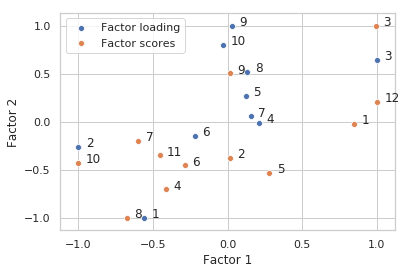

In [13]:
# Plot
#plt.figure(figsize=(7, 7))
sns.set(context='notebook', style='whitegrid')

p1 = sns.scatterplot(A_scaled[0], A_scaled[1], label='Factor loading')
p2 = sns.scatterplot(F_scaled[0], F_scaled[1], label='Factor scores')

for line in range(0, A_scaled.shape[0]):
    p1.text(A_scaled[0][line]+0.05, A_scaled[1][line], A_scaled.index[line]+1)
for line in range(0, F_scaled.shape[0]):
    p1.text(F_scaled[0][line]+0.05, F_scaled[1][line], F_scaled.index[line]+1)

plt.xticks(np.arange(-1.0, 1.5, 0.5))
plt.yticks(np.arange(-1.0, 1.5, 0.5))
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend()

　上図が因子負荷量と因子得点のプロットである。感性語「好き」は、青の10に対応している。ユークリッド距離を用いて、「好き」からの距離を求めた結果、最も青点10に近い感性語は青点9「退屈」で、次に近い感性語は青点8「自然」であった。また、授業資料の因子負荷量と因子得点の対応付け(4)をもとにすると、青点9と青点8は共にsoftであった。  
 　人工的なデザインよりも、自然的なデザインを好むため、青点8については自身の感性と一致している。青点9の「退屈」は定義が不明であるが、同じような状態が続いているような抽象絵画やミニマル・アートのことを指しているのであれば、私の好みと一致している。また、今回最も距離が遠くなった青点1の「かわいい」は個人的に苦手であるため、自身の感性を大まかではあるが正しく表現することができていると考える。  
　サンプルについては、サンプル9が最も近く、次にサンプル3が近い結果となった。サンプル9は自然的、サンプル3はシンプルで派手というのが私のイメージであり、前者は好きだが、後者はあまり好きではない。図のサンプル9を見ると、感性語「自然」に近いことからイメージが当たっている。サンプル3は、感性語「自然」と「退屈」から離れており、soft and warmであるためイメージが異なっていた。